<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-Colab/blob/main/7.1.%20Conv_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [ ]:
import torch.nn as nn

In [ ]:
class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

In [ ]:
class UnFlatten(nn.Module):
  def forward(self, input, size=1024):
    return input.view(input.size(0), size, 1, 1)

In [ ]:
class autoencoder(nn.Module):
  def __init__(self,i=1024,o=64):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      Flatten(),
      nn.Linear(in_features=i, out_features=o),
    )
    self.decoder = nn.Sequential(
      nn.Linear(in_features=o, out_features=i),
      UnFlatten(),
      nn.ConvTranspose2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
      nn.BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.Sigmoid(),
    )

  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

In [ ]:
model=autoencoder()
model.to(device)
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, t

In [ ]:
from torchsummary import summary
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             416
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          32,896
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10            [-1, 256, 8, 8]         131,328
      BatchNorm2d-11            [-1, 256, 8, 8]             512
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 512, 4, 4]         524,800
      BatchNorm2d-14            [-1, 51

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from torchvision import transforms
transformer = transforms.Compose([
  transforms.Resize((128, 128)),       
  transforms.ToTensor(),                     
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer)

In [ ]:
import torch.utils.data as Data
loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True)

#Understand code: step-by-step send one batch to AE

In [ ]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
loss = loss_func(tensorY, batchX.to(device))
print(loss)

tensor(0.5827, device='cuda:0', grad_fn=<MseLossBackward>)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [ ]:
def ConvertTensorToArray (tensorInput):
  imgTensor = torchvision.utils.make_grid(tensorInput)
  imgArray = imgTensor.numpy() 
  imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
  imgArray1[:,:,0] = imgArray[0, :, :]  
  imgArray1[:,:,1] = imgArray[1, :, :]
  imgArray1[:,:,2] = imgArray[2, :, :]
  imgArray1 = imgArray1*0.5+0.5
  return imgArray1

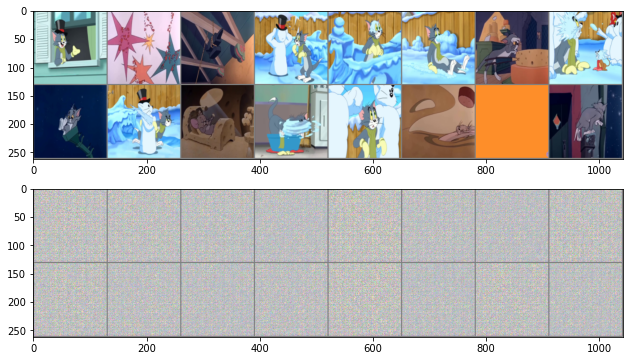

In [ ]:
#compare Input vs Output when NN is not trained yet
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Training loop

In [ ]:
epochs = 50 #for real training, change to 3000, 5000, ... 
print_interval = 5 #for real training, change to 40, 50. 

In [ ]:
lossLst = []
for epoch in range(epochs):  
  if(epoch% print_interval==0):
    print("\nepoch = ", epoch, end = ", ")
    print("batch: ", end="")
  for step, (batchX, _) in enumerate(loader):
    if(epoch% print_interval==0 and step%5==0):
      print(step, end = ",")
    tensorY = model(batchX.to(device))
    loss = loss_func(tensorY, batchX.to(device))
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch =  0, batch: 0,5,10,15,
epoch =  5, batch: 0,5,10,15,
epoch =  10, batch: 0,5,10,15,
epoch =  15, batch: 0,5,10,15,
epoch =  20, batch: 0,5,10,15,
epoch =  25, batch: 0,5,10,15,
epoch =  30, batch: 0,5,10,15,
epoch =  35, batch: 0,5,10,15,
epoch =  40, batch: 0,5,10,15,
epoch =  45, batch: 0,5,10,15,

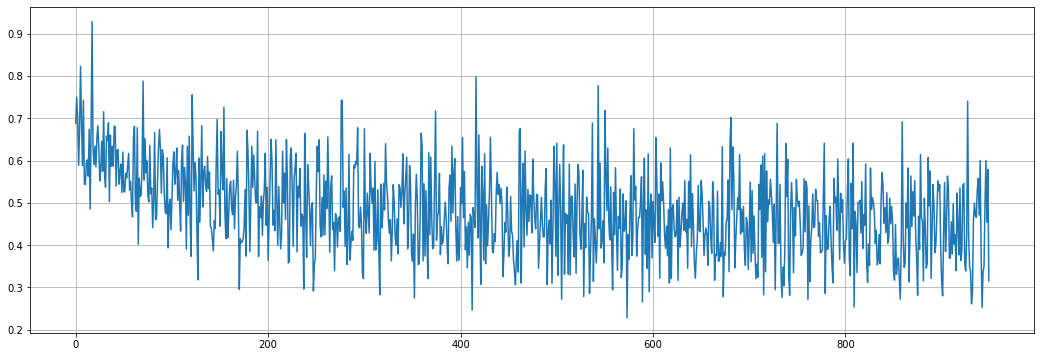

In [ ]:
fig=plt.figure(figsize=(18, 6))
plt.plot(lossLst)
plt.grid()

#Test with training images

In [ ]:
model.eval()
print("")

In [ ]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


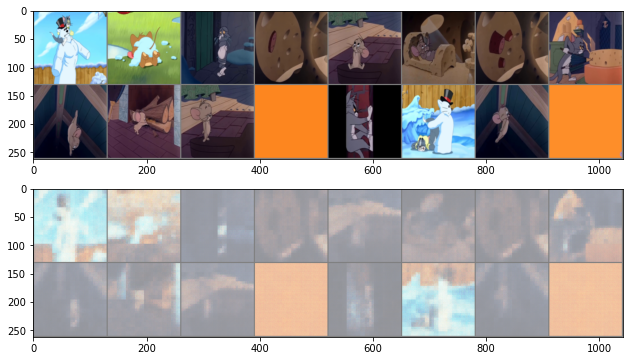

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Test with un-seen test data

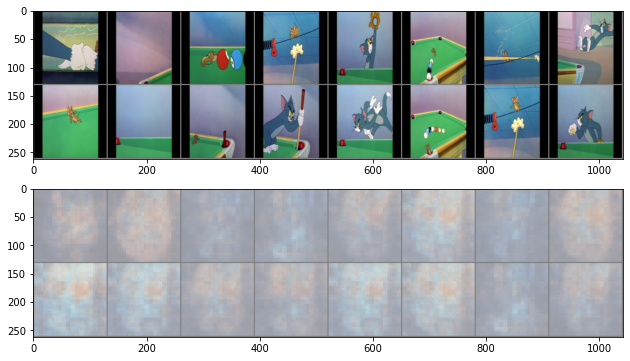

In [ ]:
test_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/test", transform = transformer)
test_loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=True)
for batchX, _ in test_loader:
  break;
tensorY=model(batchX.to(device))

fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Save and load a PyTorch model (if you need)

In [ ]:
torch.save(model.state_dict(), "AE800.pt")

In [ ]:
model=autoencoder() #build NN architecture
model.load_state_dict(torch.load("AE800.pt")) #load model weights
model.to(device)
model.eval()

# Understand code: pass a batch of training images to AE to get their latent vectors

In [ ]:
for batchX, batchY in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
# batchY in tensor, array, and reshape
arrayY = batchY.cpu().detach().numpy()
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(batchY, "\n", arrayY, "\n", arrayY.shape, "\n", arrayY1, "\n", arrayY1.shape)

tensor([0, 3, 1, 2, 4, 4, 0, 3, 2, 3, 3, 2, 4, 3, 3, 4]) 
 [0 3 1 2 4 4 0 3 2 3 3 2 4 3 3 4] 
 (16,) 
 [[0]
 [3]
 [1]
 [2]
 [4]
 [4]
 [0]
 [3]
 [2]
 [3]
 [3]
 [2]
 [4]
 [3]
 [3]
 [4]] 
 (16, 1)


In [ ]:
tensorY=model.encoder(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 64])


In [ ]:
tensorY.cpu().detach().numpy().shape

(16, 64)

In [ ]:
arrayY = np.array(tensorY.cpu().detach().numpy())
print(arrayY.shape)

(16, 64)


In [ ]:
arrayY2 = np.array(tensorY.cpu().detach().numpy())

In [ ]:
arrayY3 = np.concatenate((arrayY, arrayY2))
print(arrayY3.shape)

(32, 64)


# Get the latent vectors of all training images

In [ ]:
for step, (batchX, batchY) in enumerate(loader):
  tensorY = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(tensorY.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, tensorY.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
print(arrayX.shape, arrayY.shape)

(298, 64) (298,)


# Build a customized data loader so we can load file name information

In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder):
  """Custom dataset that includes image file names. Extends
  torchvision.datasets.ImageFolder
  """
  # override the __getitem__ method. this is the method that dataloader calls
  def __getitem__(self, index):
    # this is what ImageFolder normally returns 
    original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
    # the image file path
    path = self.imgs[index][0]
    # make a new tuple that includes original and the path
    tuple_with_path = (original_tuple + (path,))
    return tuple_with_path

In [ ]:
train_dataset1 = ImageFolderWithPaths(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer) # our custom dataset

In [ ]:
dataloader = Data.DataLoader(
    dataset=train_dataset1,
    batch_size=16,
    shuffle=True)

In [ ]:
for batchX, batchY, paths in dataloader:
  break

In [ ]:
for fname in paths:
  print(fname)

/content/gdrive/MyDrive/Image folders/train/unknown/frame269.jpg
/content/gdrive/MyDrive/Image folders/train/angry/frame144.jpg
/content/gdrive/MyDrive/Image folders/train/sad/frame129.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame152.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame217.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame82.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame175.jpg
/content/gdrive/MyDrive/Image folders/train/surprised/frame50.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame73.jpg
/content/gdrive/MyDrive/Image folders/train/surprised/frame169.jpg
/content/gdrive/MyDrive/Image folders/train/happy/frame78.jpg
/content/gdrive/MyDrive/Image folders/train/angry/frame10.jpg
/content/gdrive/MyDrive/Image folders/train/surprised/frame168.jpg
/content/gdrive/MyDrive/Image folders/train/happy/frame210.jpg
/content/gdrive/MyDrive/Image folders/train/unknown/frame248.jpg
/content/gdrive/MyDrive/Image folder

In [ ]:
# remove the prefix "/content/gdrive/MyDrive/Image folders/"
paths = {x.replace("/content/gdrive/MyDrive/Image folders/",'') for x in paths}
print(paths)

{'train/surprised/frame170.jpg', 'train/unknown/frame269.jpg', 'train/angry/frame144.jpg', 'train/happy/frame78.jpg', 'train/unknown/frame82.jpg', 'train/angry/frame10.jpg', 'train/unknown/frame175.jpg', 'train/surprised/frame169.jpg', 'train/sad/frame129.jpg', 'train/surprised/frame168.jpg', 'train/unknown/frame152.jpg', 'train/surprised/frame50.jpg', 'train/happy/frame210.jpg', 'train/unknown/frame73.jpg', 'train/unknown/frame217.jpg', 'train/unknown/frame248.jpg'}


In [ ]:
for fname in paths:
  print(fname)

train/surprised/frame170.jpg
train/unknown/frame269.jpg
train/angry/frame144.jpg
train/happy/frame78.jpg
train/unknown/frame82.jpg
train/angry/frame10.jpg
train/unknown/frame175.jpg
train/surprised/frame169.jpg
train/sad/frame129.jpg
train/surprised/frame168.jpg
train/unknown/frame152.jpg
train/surprised/frame50.jpg
train/happy/frame210.jpg
train/unknown/frame73.jpg
train/unknown/frame217.jpg
train/unknown/frame248.jpg


# Use the customized data loader to get the latent vectors of all training data

In [ ]:
fnameLst = []
for step, (batchX, batchY, paths) in enumerate(dataloader):
  tensorY = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(tensorY.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, tensorY.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
  #paths = {x.replace("/content/gdrive/MyDrive/Image folders/",'') for x in paths}
  for fname in paths:
    fnameLst.append(fname)
print(arrayX.shape, arrayY.shape, len(fnameLst))

(298, 64) (298,) 298


#Use t-SNE to reduce dimensions from 64 to 2 so we can visualize

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
# try perlexity = 5, 10, 30, 50

In [ ]:
x=tsne.fit_transform(arrayX)
print(x.shape)

(298, 2)


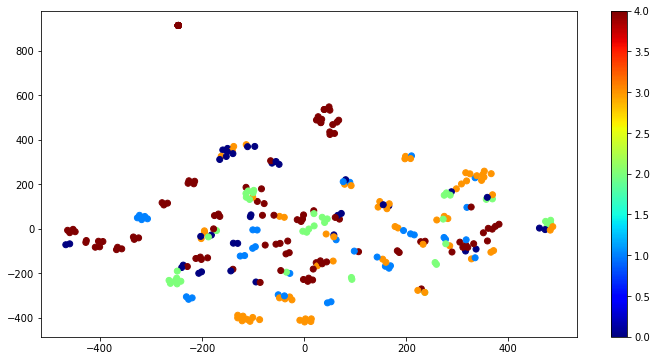

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x[:, 0], x[:, 1], c=arrayY, cmap="jet") #we have 5 classes
plt.colorbar()
plt.show()

# Save data to csv for Tableau visual exploration

merge t-SNE output (x1, x2) with label y

In [ ]:
print(x.shape, arrayY.shape, len(fnameLst))

(298, 2) (298,) 298


In [ ]:
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(arrayY1.shape)

(298, 1)


In [ ]:
XYArray = np.hstack((x, arrayY1))
print(XYArray.shape)

(298, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(XYArray)
print(df.head(5), "\n", df.shape)

            0           1    2
0 -137.969589  370.059052  3.0
1 -100.524078   -4.703471  1.0
2  -98.654312  172.742737  2.0
3  166.123627 -176.955566  1.0
4 -236.742172 -163.082977  0.0 
 (298, 3)


In [ ]:
# convert fname list to pandas
df1 = pd.DataFrame(fnameLst)
print(df1.head(5), "\n", df1.shape)

                              0
0      train/happy/frame100.jpg
1      train/happy/frame101.jpg
2      train/angry/frame231.jpg
3      train/angry/frame150.jpg
4  train/surprised/frame234.jpg 
 (298, 1)


In [ ]:
# concat when axis = 1
df = pd.concat([df1, df], axis=1, ignore_index=True)
print(df.head(5), "\n", df.shape)

                              0           1           2    3
0      train/happy/frame100.jpg -137.969589  370.059052  3.0
1      train/happy/frame101.jpg -100.524078   -4.703471  1.0
2      train/angry/frame231.jpg  -98.654312  172.742737  2.0
3      train/angry/frame150.jpg  166.123627 -176.955566  1.0
4  train/surprised/frame234.jpg -236.742172 -163.082977  0.0 
 (298, 4)


In [ ]:
 # Save data to excel for further Tableau visualization
df.to_csv("tSNE.csv", index=False)